In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker
%matplotlib inline

# PARAMETERS

In [128]:
#SET THOSE TWO PARAMETERS AND RUN THE SCRIPT
experiment_name = "190320_01"
experiment_path = "/Users/annabogdanova/Documents/Codes/SwarmGE/GECCO19/results/"

## FOLDER HANDLING

In [129]:
output_path = experiment_path+"training_postprocessing/"
if not os.path.isdir(output_path):
    os.mkdir(output_path)

output_path = experiment_path+"training_postprocessing/"+experiment_name+"/"
os.mkdir(output_path)

# LOG

In [131]:
file_path = experiment_path+experiment_name+"/log.csv"

#load data
data_log = pd.read_csv(file_path, header=None)

#header
header = ["GENERATIONS", "MULTIPLIER", "FIT_MEDIAN"]
for i in range(1, data_log.shape[1] - 2):
    header.append("FIT_INDV_"+str(i))
data_log.columns = header

#converting M to log M
data_log["MULTIPLIER"] = np.log10(data_log["MULTIPLIER"])

## Evolution of Fit_Median and Multiplier

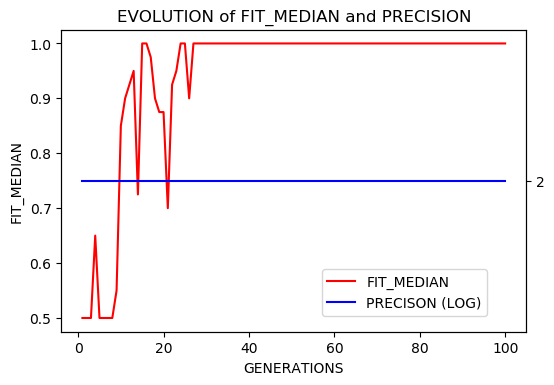

In [137]:
rcParams['figure.dpi'] = 100

x = "GENERATIONS"
y1 = "FIT_MEDIAN"
y2 = "MULTIPLIER"


fig, ax1 = plt.subplots()
ax1.set_title("EVOLUTION of FIT_MEDIAN and PRECISION")
ax1.plot(data_log[x], data_log[y1], '-r', label='FIT_MEDIAN')
ax1.set_xlabel(x)
ax1.set_ylabel(y1)

tick_spacing = 1
ax2 = ax1.twinx()
ax2.plot(data_log[x], data_log[y2], '-b', label='PRECISON (LOG)')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#ax.legend(loc='upper left')
fig.legend(loc=(0.58,0.18))
plt.savefig(output_path+"pop_evo.png", dpi=250)

## Evolution of Individuals

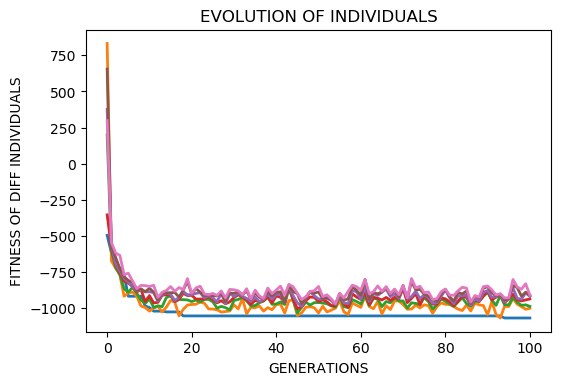

In [393]:
rcParams['figure.dpi'] = 100

x = "GENERATIONS"
y = data_log.columns[3:10]

_, ax = plt.subplots()
ax.plot(data_log[x], data_log[y], lw = 2)
ax.set_title("EVOLUTION OF INDIVIDUALS")
ax.set_xlabel(x)
ax.set_ylabel("FITNESS OF DIFF INDIVIDUALS")

# print("MAX MIN")
# print(data_log[y].max().max(), data_log[y].max().min())

plt.savefig(output_path+"indv_evo.png", dpi=250)

# HISTORY

In [502]:
file_path = experiment_path+experiment_name+"/history.csv"

#load data
data_his_raw = pd.read_csv(file_path)
data_his_raw.head()

,gen,indv,hh_fit,bbob_f001_i01_d10,bbob_f001_i02_d10,bbob_f001_i03_d10,bbob_f001_i04_d10,bbob_f001_i05_d10,bbob_f001_i71_d10,bbob_f001_i72_d10,...,bbob_f015_i01_d10,bbob_f015_i02_d10,bbob_f015_i03_d10,bbob_f015_i04_d10,bbob_f015_i05_d10,bbob_f015_i71_d10,bbob_f015_i72_d10,bbob_f015_i73_d10,bbob_f015_i74_d10,bbob_f015_i75_d10
0,0,0,0.50,121.481132,418.368138,-186.336133,-121.916667,2.611608,260.325134,259.946129,...,1169.169892,290.756986,149.825745,193.167610,137.592271,-97.559698,314.322768,439.382329,-673.825879,151.155435
1,0,1,0.50,95.714612,447.398857,-219.571207,-112.978590,0.623116,223.389372,212.277784,...,1191.154749,263.465960,173.089774,159.935698,83.094340,-149.717825,250.040588,218.458170,-745.734912,132.279864
2,0,2,0.50,92.582044,424.717299,-221.119253,-134.128761,-5.673824,197.132636,209.746676,...,1203.791494,238.591673,156.722623,175.669753,53.584281,-199.876652,291.793025,153.688299,-845.066000,88.785373
3,0,3,0.50,91.028457,468.455196,-207.521313,-120.710144,-3.820978,211.591293,222.829481,...,1189.458971,257.459668,193.003010,202.921664,56.938240,-216.306092,259.228314,105.741432,-827.801923,112.331853
4,0,4,0.55,95.451339,404.483512,-239.524312,-138.840498,-9.503674,197.527889,195.055323,...,1241.569258,214.172681,97.306001,158.903995,5.888814,-218.992996,195.652034,88.076733,-898.171058,-5.897918


In [501]:
data_hist = pd.DataFrame(columns=["PROBLEM", "GENERATION", "MIN"])
problems = data_his_raw.columns[3:]

for i in range(data_his_raw["gen"].max()):
    tmp = data_his_raw[data_his_raw["gen"]==i]
    
    for p in problems:
        g = i
        m = tmp[p].min()
        
        data_hist.loc[len(data_hist)] = [p,g,m]
        
data_hist = data_hist.sort_values(by=["PROBLEM", "GENERATION"])
data_hist.head()

,PROBLEM,GENERATION,MIN
0,bbob_f001_i01_d10,0,82.523453
20,bbob_f001_i01_d10,1,81.952383
40,bbob_f001_i01_d10,2,80.271870
60,bbob_f001_i01_d10,3,80.104134
80,bbob_f001_i01_d10,4,79.855887


In [396]:
import pickle
file = open("bbob_final_target_fvalue1.pkl",'rb')
d = pickle.load(file)
file.close()

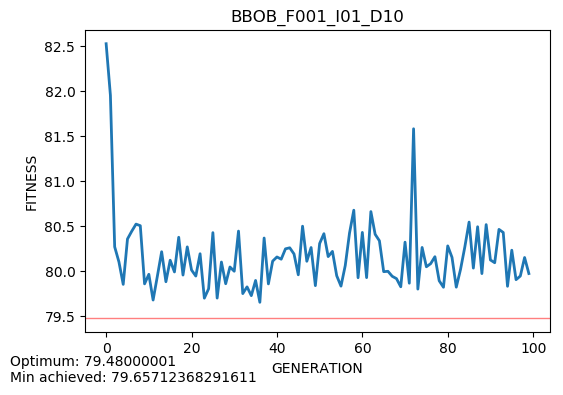

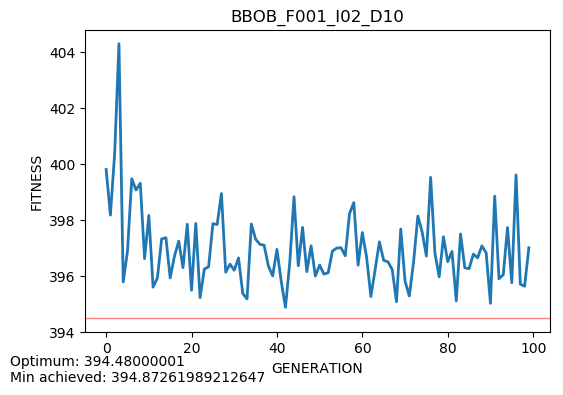

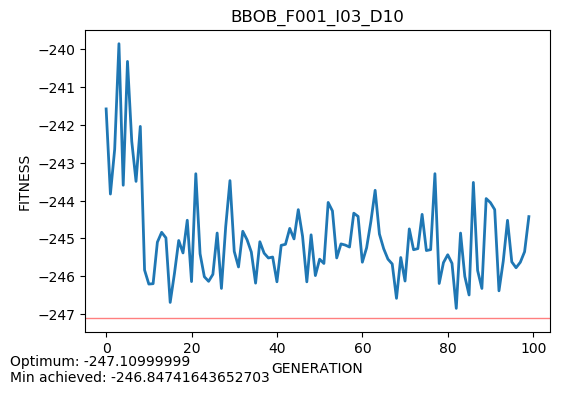

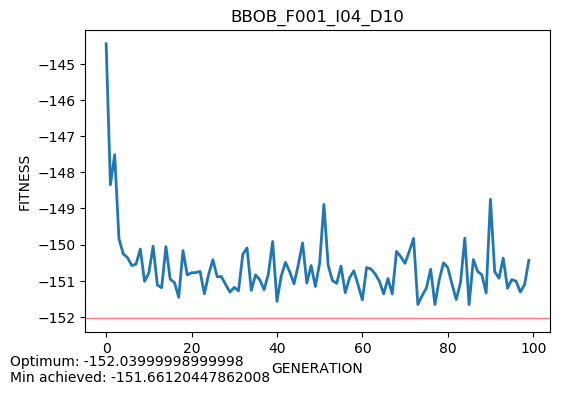

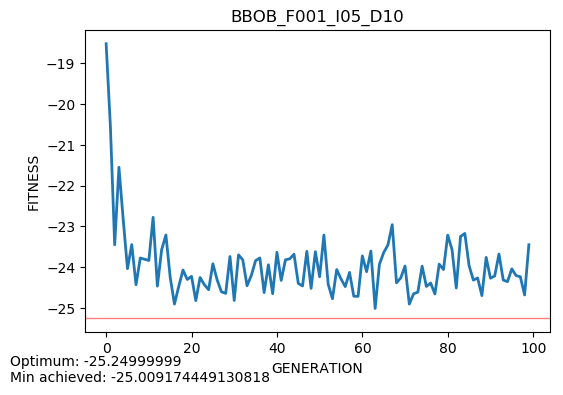

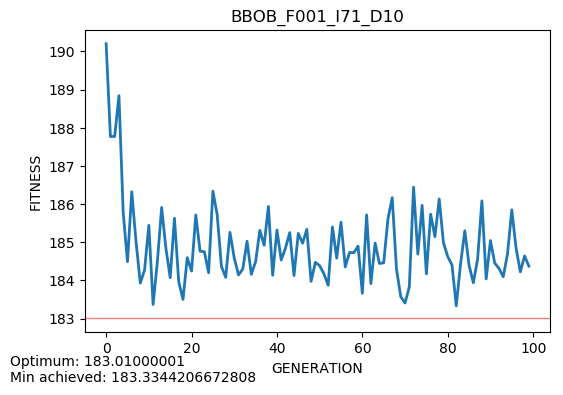

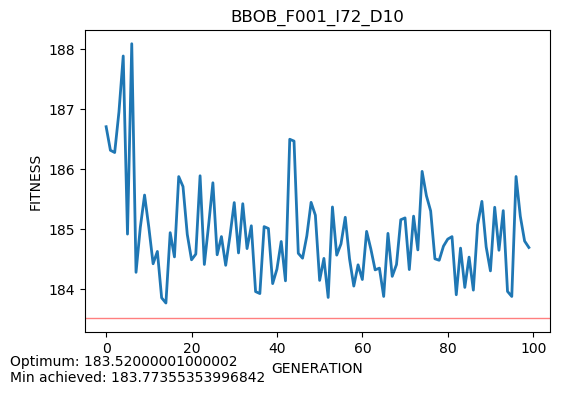

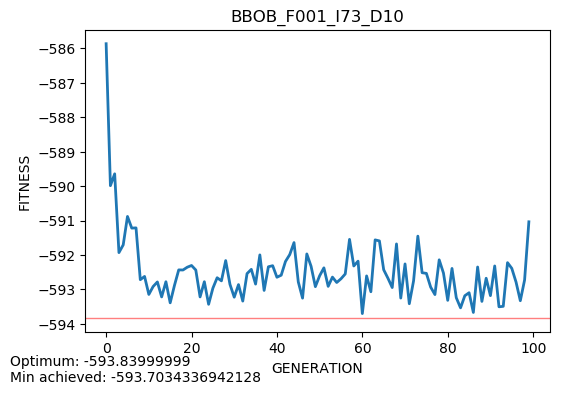

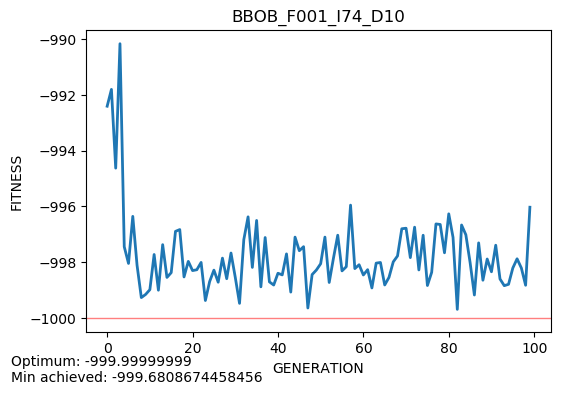

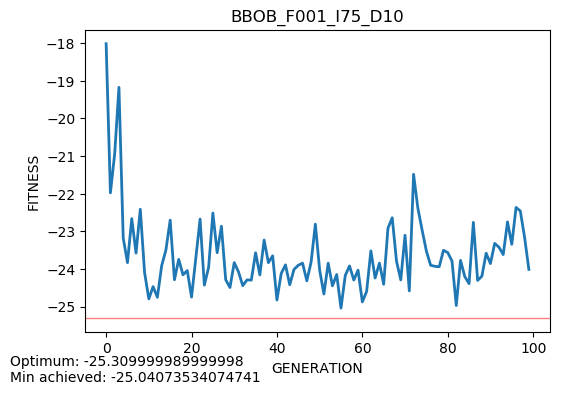

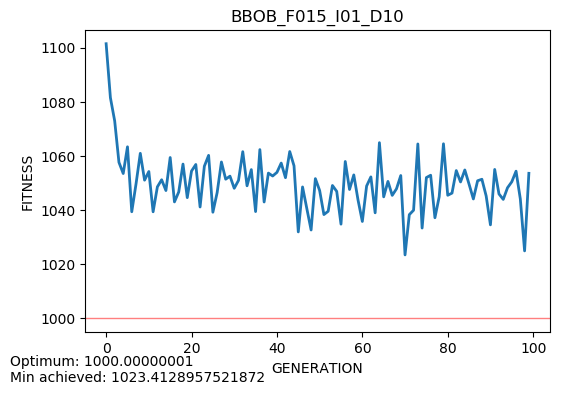

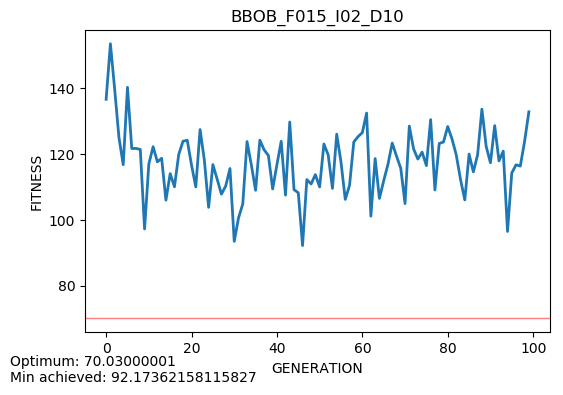

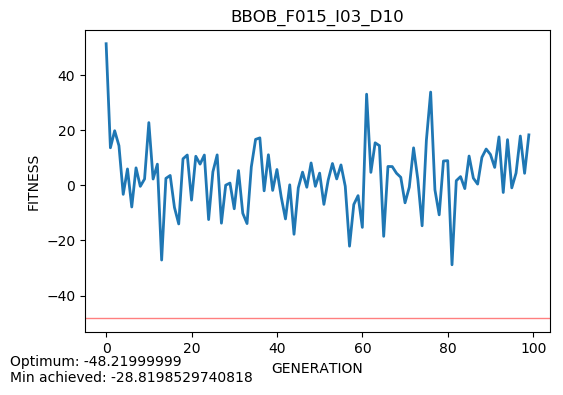

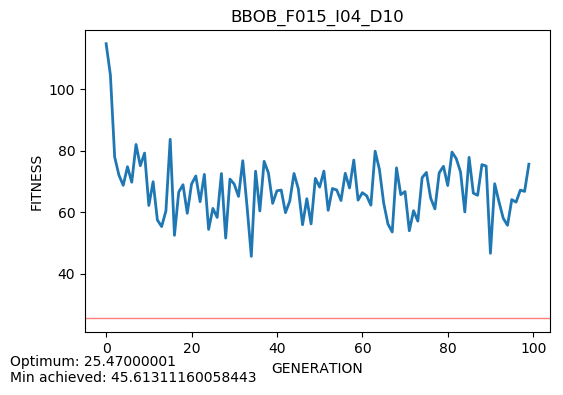

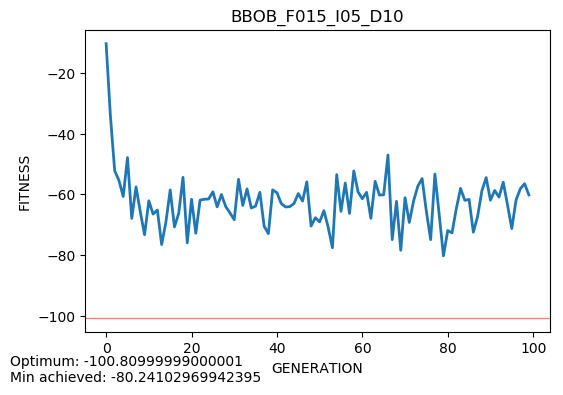

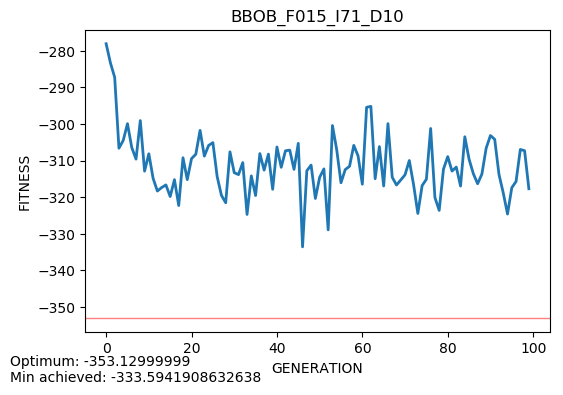

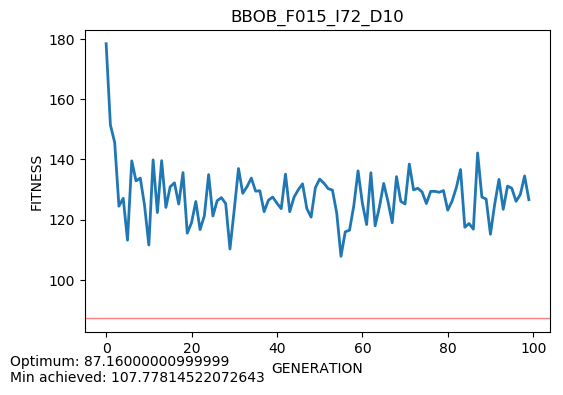

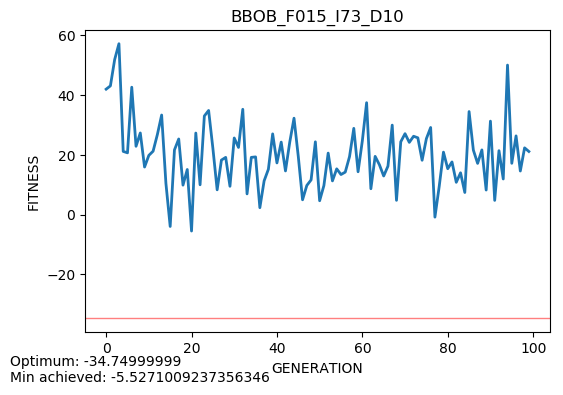

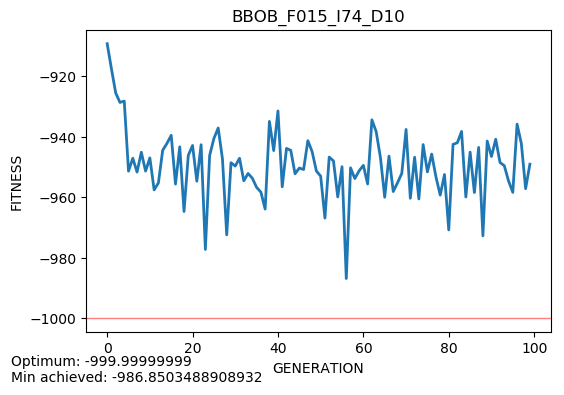

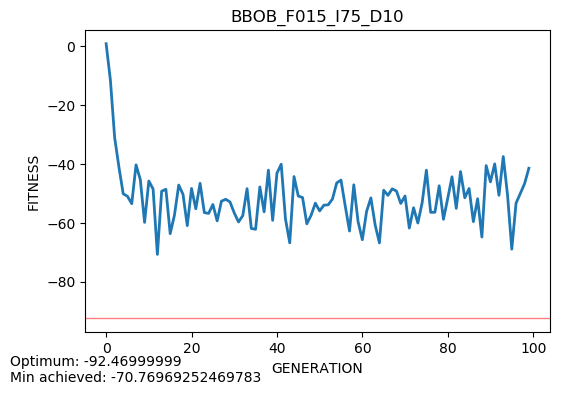

In [397]:
rcParams['figure.dpi'] = 100

for problem in problems:
    x = "GENERATION"
    y = "MIN"

    tmp = data_hist[data_hist["PROBLEM"]==problem]

    _, ax = plt.subplots()
    ax.plot(tmp[x], tmp[y], lw = 2)
    ax.axhspan(d[problem], d[problem], color='red', alpha=0.5)
    #ax.set_title(problem.upper()+"\n"+"Opt: "+str(d[problem])+"\n"+"Min: "+str(tmp[y].min()), loc="left")
    
    ax.set_title(problem.upper())
    plt.figtext(0, 0, "Optimum: "+str(d[problem])+"\n"+"Min achieved: "+str(tmp[y].min()))
    ax.set_xlabel("GENERATION")
    ax.set_ylabel("FITNESS")
    
    plt.savefig(output_path+problem+".png", dpi=250)

In [382]:
(6 * 2 * 22)/60

4.4

In [383]:
(6*8*5)/60

4.0